In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(360, 360, 3)


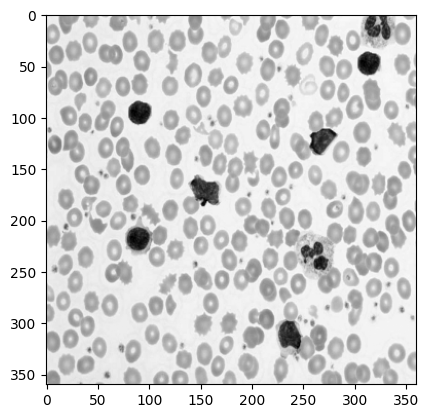

In [64]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/cell.bmp')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gimg1, cmap = 'gray')

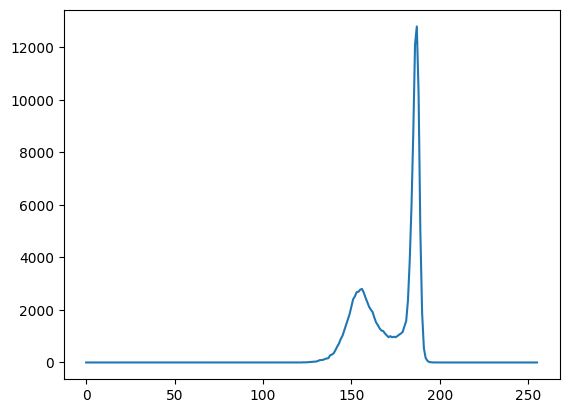

In [74]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)

In [66]:
gBin = np.zeros((gimg1.shape[0], gimg1.shape[1]), dtype=np.ubyte)

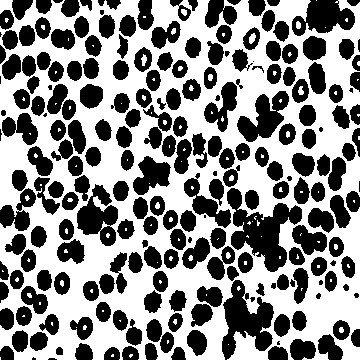

In [68]:
Threshold = 180
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if gimg1[h, w] > Threshold:
      gBin[h, w] = 255
    else:
      gBin[h, w] = 0

cv2_imshow(gBin)

In [69]:
T1 = 128
T2 = 0
T0 = 1

In [70]:
def threshold_update(img, bimg, T1):
  sum1 = 0
  count1 = 1 # 0이나 1이나 이미지에서는 미미한 차이지만 0으로 나눌 경우에는 오류 발생하기에 1로 설정
  sum2 = 0
  count2 = 1

  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if(bimg[h, w] == 0):
        sum1 = np.int32(sum1 + img[h, w])
        count1 += 1
      else:
        sum2 = np.int32(sum2 + img[h, w])
        count2 += 1
  avg1 = sum1/count1
  avg2 = sum2/count2
  T = (avg1 + avg2)/2
  return T

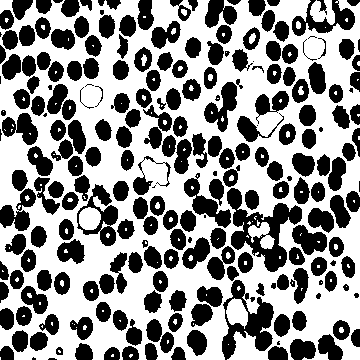

In [71]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if gimg1[h, w] > T1:
      gBin[h, w] > 0
    else:
      gBin[h, w] = 255

cv2_imshow(gBin)

171.86190040606056


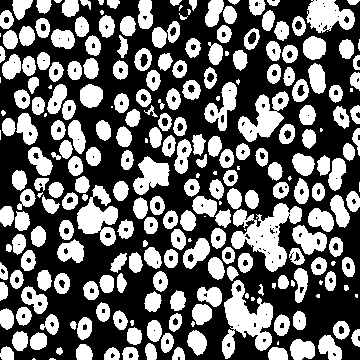

In [76]:
while True:
  T2 = threshold_update(gimg1, gBin, T1)

  if(np.abs(T1-T2) < T0):
    break;
  else:
    T1 = T2
    for h in range(gimg1.shape[0]):
      for w in range(gimg1.shape[1]):
        if gimg1[h, w] > T1:
          gBin[h, w] = 0
        else:
          gBin[h, w] = 255

print(T2)
cv2_imshow(gBin)